In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates
%matplotlib inline

In [2]:
now = datetime.datetime.now()
begindate = now.strftime("%Y%m%d")
enddate = datetime.datetime.now() + datetime.timedelta(days=1)
enddate = enddate.strftime("%Y%m%d")

#get tides
url = 'https://tidesandcurrents.noaa.gov/api/datagetter?product=predictions&application=NOS.COOPS.TAC.WL&begin_date=' + begindate + '&end_date=' + begindate +'&datum=MLLW&station=9414290&time_zone=lst_ldt&units=english&interval=6&format=json'
#url = 'https://tidesandcurrents.noaa.gov/api/datagetter?product=predictions&application=NOS.COOPS.TAC.WL&begin_date=20181201&end_date=20181231&datum=MLLW&station=9414290&time_zone=lst_ldt&units=english&interval=6&format=json'
page = requests.get(url)
tides = pd.DataFrame(page.json()['predictions'])
    
    

tides['t'] = pd.to_datetime(tides['t'])
tides.set_index('t')
tides = tides.set_index('t')
tides['v'] = pd.to_numeric(tides['v'])

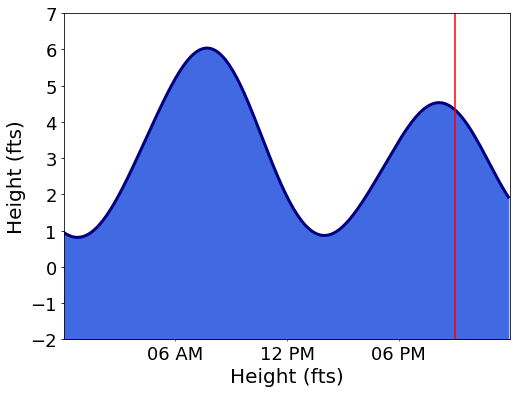

In [3]:
toplot = tides[:]['v']


fig, ax = plt.subplots(figsize= (8,6))

ax.plot(toplot.index, toplot.values, linewidth =3, color = 'navy');
plt.ylabel('Height (fts)', size=20)

#have to change that
ax.set_xlim(begindate, enddate)
ax.set_ylim(-2,7)


ax.fill_between(toplot.index, toplot.values, -2, color="royalblue")
#ax2.fill_between(x, y1, 1)
ax.axvline(datetime.datetime.now(), color='r');

hourlocator = matplotlib.dates.HourLocator(byhour=[6,12,18])
ax.xaxis.set_minor_locator(hourlocator)   # every 4 hours
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%I %p'))  # hours and minutes

ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('\n%d-%b')) 

ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)

plt.xlabel('Height (fts)', size=20);